In [ ]:
import cv2
from IPython.display import display, Image
import matplotlib.pyplot as plt



In [ ]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [ ]:
model=cv2.dnn_DetectionModel(frozen_model, config_file)
classLabels=[]
file_name='level.txt'
with open(file_name, 'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
print(len(classLabels))


80


In [ ]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127, 5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f5043384cd0>

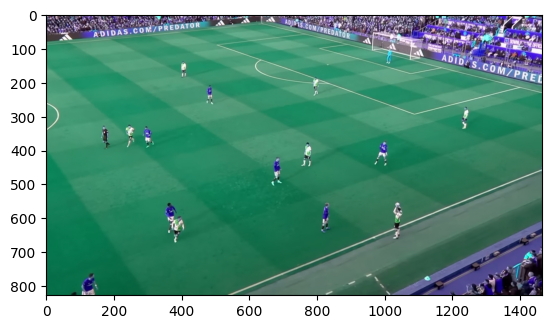

In [ ]:
img=cv2.imread('11.png')
plt.imshow(img)


In [ ]:
ClassInbdex, confidece, bbox=model.detect(img, confThreshold=0.5)
print(ClassInbdex)


[1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassInbdex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

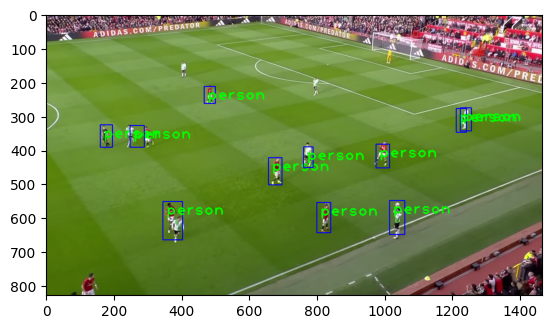

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
# cap=cv2.VideoCapture('Foot.MP4')
# if not cap.isOpened():
#      cap=cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot open video")

# font_scale=3
# font=cv2.FONT_HERSHEY_PLAIN

# while True:
#    ret, frame=cap.read()

#    ClassIndex, confidece, bbox=model.detect(frame, confThreshold=0.55)
#    if(len(ClassInbdex)!=0):
#        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
#            if(ClassInd<=80):
#                cv2.rectangle(frame, boxes,(255,0,0),2)
#                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=3)

#    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#    if cv2.waitKey(2) & 0xff==ord('q'):
#        break

# cap.release()
# cv2.destroyALLWindows()

cap = cv2.VideoCapture('Foot.MP4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")

# Load your pre-trained model
# Assuming `model` is your pre-trained model for object detection

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    if not ret:
        break

    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    if len(ClassIndex) != 0:
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if ClassInd <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    _, frame = cv2.imencode('.jpg', frame)
    frame = frame.tobytes()
    display(Image(data=frame))

Output hidden; open in https://colab.research.google.com to view.